# Fuzzy C-Means

FCM allows soft clustering, i.e., data points to belong to multiple clusters with varying degrees of membership. 

**Fuzziness Parameter (m):** 
- The parameter m controls the degree of fuzziness in FCM.
- A higher value of m leads to softer cluster boundaries, allowing for more overlap between clusters and greater fuzziness in the cluster assignments.
- When m=1, FCM reduces to hard clustering, equivalent to K-Means.

**Objective Function:** FCM aims to minimize the fuzzy objective function, which incorporates the distances between data points and cluster centroids weighted by membership values.

In [1]:
#!pip install scikit-fuzzy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import skfuzzy as fuzz

In [3]:
# Generate synthetic data
n_samples = 500
n_features = 2
centers = 3
cluster_std = 1.0
random_state = 42
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=random_state)

### Fuzzy C-Means clustering

Adjust parameters such as the number of clusters (c), the fuzziness parameter (m), and convergence criteria to achieve optimal results.

Data Points and their Cluster Memberships:
     Feature 1  Feature 2  Cluster Membership
0    -5.730354  -7.583286                   0
1     1.942992   1.918875                   2
2     6.829682   1.164871                   2
3    -2.901306   7.550771                   1
4     5.841093   1.565094                   2
..         ...        ...                 ...
495  -5.480272  -5.955476                   0
496  -2.586299   9.355438                   1
497   4.304094   3.642191                   2
498  -7.402350  -5.831100                   0
499   5.159225   3.505909                   2

[500 rows x 3 columns]


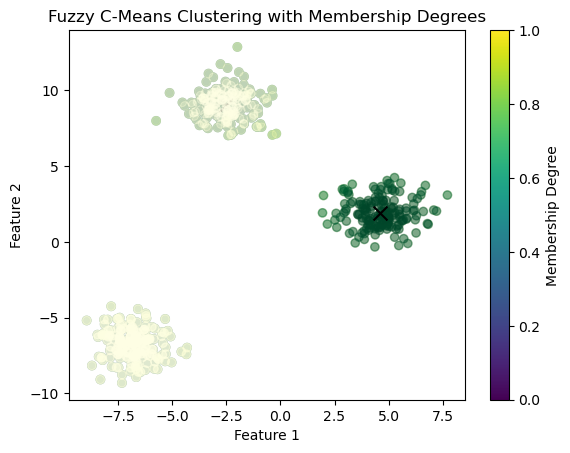

In [6]:
# Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c=centers, m=2, error=0.005, maxiter=1000, init=None)

# Assigning cluster membership to each data point
cluster_membership = np.argmax(u, axis=0)

# Creating a DataFrame to display points and their cluster memberships
data_df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data_df['Cluster Membership'] = cluster_membership

# Displaying the DataFrame
print("Data Points and their Cluster Memberships:")
print(data_df)

# Plotting the clustered data with membership degrees
for j in range(centers):
    plt.scatter(X[:, 0], X[:, 1], c=u[j], cmap='YlGn', alpha=0.5)
    # Marking the cluster centers
    plt.scatter(cntr[j, 0], cntr[j, 1], marker='x', color='k', s=100)

plt.colorbar(label='Membership Degree')
plt.title('Fuzzy C-Means Clustering with Membership Degrees')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()